# **Assignment \#2**: Machine Learning MC886
University of Campinas (UNICAMP), Institute of Computing (IC)

Prof. Sandra Avila, 2020s2



In [ ]:
# TODO: RA & Name 
print('198105: ' + 'Giovanni Torres Chaves')
print('222854: ' + 'Nathan Brusamarello de Souto')

198105: Giovanni Torres Chaves
222854: Nathan Brusamarello de Souto


## Objective 

Explore **classification techniques** (logistic regression & neural networks) and come up with the best possible model to the problem, avoiding overfitting. In particular, build an object recognition system to accurately classify images using the Fashion-MNIST dataset (https://github.com/zalandoresearch/fashion-mnist).

## Dataset

Fashion-MNIST is a dataset of Zalando's article images, consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.


Each training and test example is assigned to one of the following labels:

**Label 	Description**
- 0 	t-shirt/top
- 1 	trouser
- 2 	pullover
- 3 	dress
- 4 	coat
- 5 	sandal
- 6 	shirt
- 7 	sneaker
- 8 	bag
- 9 	ankle boot

**Dataset Information:**

- You should respect the following traininig/test split: 60,000 training examples, and 10,000 test examples. Avoid overfitting.
- The data is available at: https://www.dropbox.com/s/qawunrav8ri0sp4/fashion-mnist-dataset.zip: 'train' folder (fashion-mnist_train.csv.zip) + 'test' folder (fashion-mnist_test.csv.zip)	
- Each row is a separate image. Column 1 is the class label. Remaining columns are pixel numbers (784 total). Each value is the darkness of the pixel (1 to 255). Dataset was converted to CSV with this script: https://pjreddie.com/projects/mnist-in-csv.


## Deadline

Monday, November 16th 7pm. 

Penalty policy for late submission: You are not encouraged to submit your assignment after due date. However, in case you did, your grade will be penalized as follows:
- November 17th 7pm : grade * 0.75
- November 18th 7pm : grade * 0.5
- November 19th 7pm : grade * 0.25


## Submission

On Google Classroom, submit your Jupyter Notebook (in Portuguese or English).

**This activity is NOT individual, it must be done in pairs (two-person group).**

In [ ]:
from google.colab import drive #importei meu drive para pegar os dados
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#TODO: Load and preprocess your dataset. Plot graphics.
import numpy as np
import pandas as pd
import matplotlib.colors
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15,15)
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from random import seed, sample

from keras.models import Sequential
from keras.layers.core import Dense, Dropout
from keras import optimizers, regularizers, initializers

from matplotlib.colors import ListedColormap

from random import seed
from random import random
from math import exp

In [ ]:
#Lendo os dados
df=pd.read_csv("/content/drive/My Drive/Colab Notebooks/fashion-mnist_train.csv")
#separando os dados de treino em treino e validação
train = df[0:55000]
validation = df[55000:60000]

## Activities

1. (2 points) Perform Multinomial Logistic Regression (_i.e._, softmax regression). It is a generalization of Logistic Regression to the case where we want to handle multiple classes. **You should implement your solution**.


In [ ]:
def softmax(x):
    """ applies softmax to an input x"""
    e_x = np.exp(x)
    return e_x / e_x.sum()

In [ ]:
# TODO: Multinomial Logistic Regression. Implement your solution. You cannot use scikit-learn libraries.
#inicializando com números aleatórios
np.random.seed(198105)
n = 784
neurons = 10
theta = np.random.randn(neurons,n)*np.sqrt(2.0/n)
x = train.drop("label",axis = 1).to_numpy()
y = train['label'].to_numpy()
#falta conseguir fazer o bias atualizar nate
bias = np.random.randn(neurons,1)

In [ ]:
#Todas
#forward
tam = 10
epochs = 0
m = 55000
learning_rate = 0.5
while epochs<tam:
  deltao = np.zeros((10,784), dtype=np.float64)
  for i in range(m):
    #forward
    a = x[i]/255
    z = np.transpose(np.dot(theta,a)+np.transpose(bias))
    out =  softmax(z) 
    solucao = np.array([[0],[0],[0],[0],[0],[0],[0],[0],[0],[0]])
    solucao[y[i]] = 1
    #backward
    delta = out-solucao
    a = a.reshape((784,1))
    deltao += np.dot(delta,np.transpose(a))
  D = deltao/m 
  theta = theta - learning_rate*D
  epochs += 1

In [ ]:
#eficiencia modelo
acerto = 0
erros = 0
erro = []
for i in range(55000):
  a = x[i]/255
  z = np.transpose(np.dot(theta,a)+np.transpose(bias))
  out =  softmax(z) 
  resposta = np.array([[0],[0],[0],[0],[0],[0],[0],[0],[0],[0]])
  resposta[y[i]] = 1
  erroq = sum((out - resposta)**2)
  erro.append(erroq)
  if sum(out*resposta) == 0 or sum(out)!=1:
    erros += 1
  else:
    acerto += 1
print("Acertos =",acerto,"e erros =",erros)
print("O erro quadrático é:", sum(erro))

Acertos = 29371 e erros = 25629
O erro quadrático é: [36256.57504155]


In [ ]:
# TODO: Multinomial Logistic Regression. Implement your solution. You cannot use scikit-learn libraries.
#inicializando com números aleatórios
x_val = validation.drop("label",axis = 1).to_numpy()
y_val = validation['label'].to_numpy()

In [ ]:
#validation
acerto = 0
erros = 0
erro = []
for i in range(5000):
  a = x_val[i]/255
  z = np.transpose(np.dot(theta,a)+np.transpose(bias))
  out =  softmax(z) 
  resposta = np.array([[0],[0],[0],[0],[0],[0],[0],[0],[0],[0]])
  resposta[y_val[i]] = 1
  erroq = sum((out - resposta)**2)
  erro.append(erroq)
  if sum(out*resposta) == 0 or sum(out)!=1:
    erros += 1
  else:
    acerto += 1
print("Acertos =",acerto,"e erros =",erros)
print("O erro quadrático é:", sum(erro))

Acertos = 2671 e erros = 2329
O erro quadrático é: [3299.89406351]



> What are the conclusions? (1-2 paragraphs)

Através da construção do modelo, foi possível atingir um erro quadrático de 3299.89 e uma acurácia de 53.42% na fase de validação. É um modelo razoável, dado a sua acurácia, porém ele pode ser aprimorado para alcançar acurácias maiores nesse problema proposto.


2. (6 points) Move on to Neural Networks, using _one_ or _two hidden layers_. **You should implement your solution** (weight & bias initialization, forward propagation, backward propagation, activation function, ...).


In [ ]:
# TODO: Neural Network. Implement your solution. You cannot use scikit-learn libraries.
# Iniciando a rede
def iniciar(entrada, interna, saida):
	rede = list()
	camada_interna = [{'pesos':[random() for i in range(entrada + 1)]} for i in range(interna)]
	rede.append(camada_interna)
	camada_saida = [{'pesos':[random() for i in range(interna + 1)]} for i in range(saida)]
	rede.append(camada_saida)
	return rede
  
# Calcula o valor de saida da camada
def entrada_da_camada(pesos, entrada):
	ativacao = pesos[-1]
	for i in range(len(pesos)-1):
		ativacao += pesos[i] * entrada[i]
	return ativacao

# Função sigmoide
def sigmoid(ativacao):
	return 1.0 / (1.0 + exp(-ativacao))
 
# Forward propagation
def forward(rede, linha):
	entry = linha
	for camada in rede:
		new_entry = []
		for neuronio in camada:
			ativa = entrada_da_camada(neuronio['pesos'], entry)
			neuronio['saida'] = sigmoid(ativa)
			new_entry.append(neuronio['saida'])
		entry = new_entry
	return entry

# Derivada da sigmoide
def sigmoid_deri(output):
	return output * (1.0 - output)
 
 # Back propagation
def backward(rede, esperado):
	for i in reversed(range(len(rede))):
		camada = rede[i]
		erros = list()
		if i != len(rede)-1:
			for j in range(len(camada)):
				error = 0.0
				for neuronio in rede[i + 1]:
					error += (neuronio['pesos'][j] * neuronio['delta'])
				erros.append(error)
		else:
			for j in range(len(camada)):
				neuronio = camada[j]
				erros.append(esperado[j] - neuronio['saida'])
		for j in range(len(camada)):
			neuronio = camada[j]
			neuronio['delta'] = erros[j] * sigmoid_deri(neuronio['saida'])

# Atualiza os pesos
def atualiza_peso(rede, linha, l_r):
	for i in range(len(rede)):
		entry = linha[:-1]
		if i != 0:
			entry = [neuronio['saida'] for neuronio in rede[i - 1]]
		for neuronio in rede[i]:
			for j in range(len(entry)):
				neuronio['pesos'][j] += l_r * neuronio['delta'] * entry[j]
			neuronio['pesos'][-1] += l_r * neuronio['delta']

#Treinando a rede
def treinar_rede(rede, treino, l_r, epocas, saida):
	for epoch in range(epocas):
		sum_erro = 0
		for linha in treino:
			resultado = forward(rede, linha)
			esperado = [0 for i in range(saida)]
			esperado[linha[-1]] = 1
			sum_erro += sum([(esperado[i]-resultado[i])**2 for i in range(len(esperado))])
			backward(rede, esperado)
			atualiza_peso(rede, linha, l_r)
		print('época = %d, erro quadrático = %.3f' % (epoch, sum_erro))

In [ ]:
seed(198105)
train = df[0:100]
#separando as variáveis em features e resposta
x = train.drop("label",axis = 1) 
y = train['label']
x['label'] = y
dados_treino = x.to_numpy()
#inicializando a rede
minha_rede = iniciar(entrada = 784, interna = 10, saida = 10)
#treinando a rede
treinar_rede(rede = minha_rede, treino = dados_treino, l_r = 0.1, epocas = 15, saida = 10)
for camada in minha_rede:
	print(camada)

In [ ]:
#comparar os modelos com apenas 100 observações, pois é muito demorado para as 55000
x = train.drop("label",axis = 1).to_numpy()
y = train['label'].to_numpy()
acerto = 0
erros = 0
erro = []
for i in range(100):
  a = x[i]/255
  z = np.transpose(np.dot(theta,a)+np.transpose(bias))
  out =  softmax(z) 
  resposta = np.array([[0],[0],[0],[0],[0],[0],[0],[0],[0],[0]])
  resposta[y[i]] = 1
  erroq = sum((out - resposta)**2)
  erro.append(erroq)
  if sum(out*resposta) == 0 or sum(out)!=1:
    erros += 1
  else:
    acerto += 1
print("Acertos =",acerto,"e erros =",erros)
print("O erro quadrático é:", sum(erro))

Acertos = 44 e erros = 56
O erro quadrático é: [70.22609092]


> What are the conclusions? Regarding the Multinomial Logistic Regression model, does the performance improve? (2-4 paragraphs)

A solução implementada na mão é muito lenta e praticamente impossível treinar o modelo para todas as observações, por isso treinamos com um conjunto de apenas 100 observações para verificar mais facilmente o comportamento do erro quadrático.

A saída do modelo retorna os pesos de cada camada para cada neurônio incluído na rede e o valor do erro quadrático por época.

Podemos ver que para 100 observações o modelo de regressão logística se portou melhor.  Obtivemos um erro quadrático de 70.22 na regressão logística e 90.132 na rede neural com uma camada interna.

3. (1 point) Apply two update rules used to optimize Neural Networks (for example, Momentum, Adagrad, Adam, RMSProp, Adadelta). For reference, see http://ruder.io/optimizing-gradient-descent.

In [ ]:
#Dados para o problema
train = df[0:55000]
validation = df[55000:60000]
X_train = train.drop("label",axis = 1).to_numpy()
Y_train = train['label'].to_numpy().reshape(55000,1)
X_val = validation.drop("label",axis = 1).to_numpy()
Y_val = validation['label'].to_numpy().reshape(5000,1)

In [ ]:
# TODO: Apply two update rules used to optimize Neural Networks.
#Montando a rede para optimizar
np.random.seed(198105)
model = []
historyList = []
optim = ['adagrad','adam']
for opt in optim:
  model = Sequential()
  model.add(Dense(10,input_shape = (784,), activation= 'sigmoid',kernel_initializer="glorot_uniform"))
  model.add(Dense(10, activation = "softmax",kernel_initializer="glorot_uniform"))
  model.compile(loss = 'binary_crossentropy',optimizer = opt, metrics = ['accuracy'])
  historyList.append(model.fit(X_train,Y_train, epochs = 5, verbose = 0, validation_data = (X_val,Y_val)))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


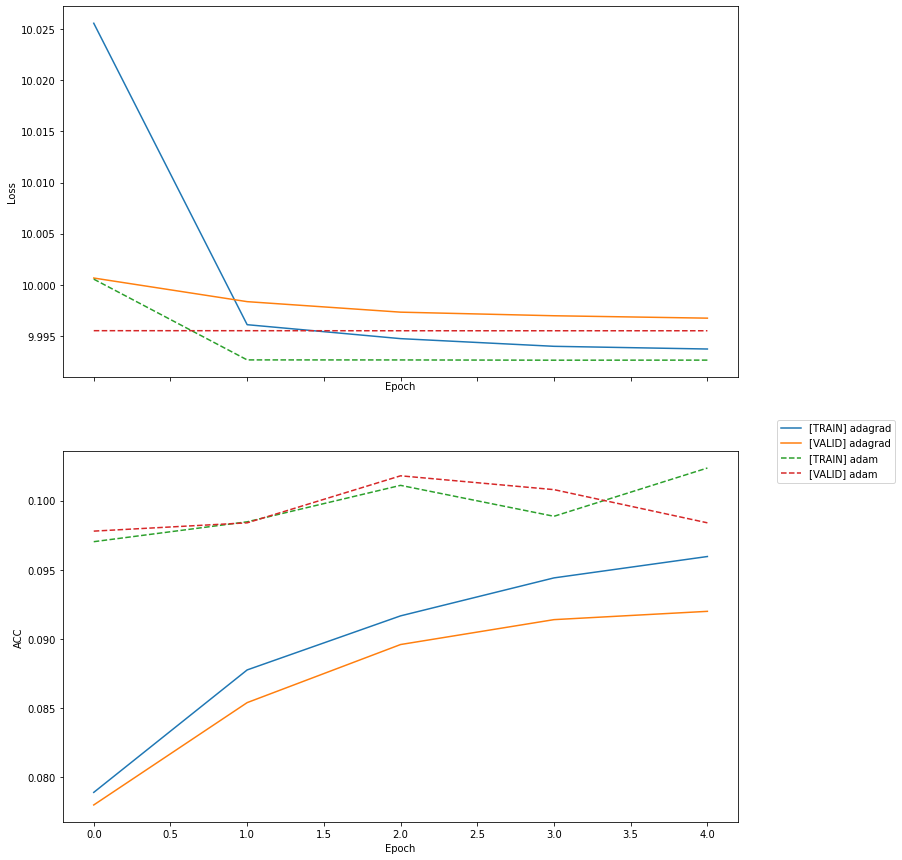

In [ ]:
def plot_loss_accuracy(historyList, legend, plotSet="both"): #função para os gráficos de perda e acurácia
    linestyles = ['-', '--', ':', '-.']
    fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True)

    #Plot Loss
    for idx,hist in enumerate(historyList):
        if plotSet in ["train", "both"]:
            ax1.plot(hist.history['loss'], linestyle=linestyles[idx%len(linestyles)])
        if 'val_loss' in hist.history.keys() and plotSet in ["valid", "both"]:
            ax1.plot(hist.history['val_loss'], linestyle=linestyles[idx%len(linestyles)])
    ax1.set_ylabel('Loss')
    ax1.set_xlabel('Epoch')

    #Plot ACC
    for idx,hist in enumerate(historyList): 
        if plotSet in ["train", "both"]:
            ax2.plot(hist.history['accuracy'], linestyle=linestyles[idx%len(linestyles)])
        if 'val_accuracy' in hist.history.keys() and plotSet in ["valid", "both"]:
            ax2.plot(hist.history['val_accuracy'], linestyle=linestyles[idx%len(linestyles)])
    ax2.set_ylabel('ACC')
    ax2.set_xlabel('Epoch')
    
    plt.legend(legend, bbox_to_anchor=(1.05, 1), loc='center left')    
    plt.subplots_adjust(right=0.75)
    plt.show()

legend = ["[TRAIN] adagrad","[VALID] adagrad", "[TRAIN] adam", "[VALID] adam"]

plot_loss_accuracy(historyList, legend, plotSet='both') #gráficos de perda e acurácia para cada forma de otimizar(treino e validação)

 > What are the conclusions? Does the performance improve? (1-2 paragraphs)

Foram aplicadas duas formas de otimização: "Adam" e "Adagrad". Ambas registraram perdas e acurácias próximas, porém "Adam" teve perda menor e "Adagrad" teve uma acurácia maior. Provavelmente, com uma rede neural com mais neurônios, poderemos tomar uma decisão melhor de qual utilizar. Mas dado que a acurácia foi pequena nas duas formas, escolheriamos a regra de atualização "Adam" para próximas redes neurais, pois ela tem menor perda.
 


4. (1 point) Pick **your best model** and plot the confusion matrix in the **test set**. You can use scikit-learn libraries.


In [ ]:
#Test data
test = pd.read_csv("/content/drive/My Drive/Colab Notebooks/fashion-mnist_test.csv")
X_test = test.drop("label",axis = 1).to_numpy()
Y_test = test['label'].to_numpy().reshape(10000,1)

In [ ]:
# TODO: Plot the confusion matrix. You can use scikit-learn libraries.
Y_pred = model.predict_classes(X_test) #Valores preditos do modelo("adam")
confusion_matrix(Y_test, Y_pred)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([[1000,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [1000,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [1000,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [1000,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [1000,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [ 998,    0,    0,    0,    1,    1,    0,    0,    0,    0],
       [1000,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [1000,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [1000,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [1000,    0,    0,    0,    0,    0,    0,    0,    0,    0]])

> What are the conclusions? (1-2 paragraphs)

Como nossa rede neural teve 2 hidden layers e 10 neurons em cada um deles, nossa matriz de confusão nos mostra que existem 1000 imagens de cada peça de roupa e nossa rede neural retorna em praticamente todas imagens a resposta 1, que é trouser (calça). Provavelmente com a construção de uma rede neural com mais hidden layers e mais neurons em cada uma deles, poderemos ter uma acurácia maior e termos mais resultados diferentes.